Lista 12

Vinicius de Souza Rios

William Chalub Cruz

In [10]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Questão 2

In [11]:
def optimal_wings(menu,asas_desejadas,Show=True):
    problem = LpProblem("Chicken_Wings",LpMinimize)  


    pedido = []
    for qtd in menu:
        pedido.append(LpVariable("Combo_"+str(qtd),0,None,LpInteger))

    problem += sum([combo*menu[int(combo.name.split("Combo_")[1])] for combo in pedido]),"Custo total"
    problem +=  sum([combo*int(combo.name.split("Combo_")[1]) for combo in pedido])>=asas_desejadas,"Minimo compra"

    problem.writeLP("Chicken_Wings.lp")
    
    problem.solve()
    
    if Show==True:
        print("Status:", LpStatus[problem.status])
    
    combos_compra = {}
    for v in problem.variables():
        if v.varValue>0:
            combos_compra[int(v.name.split("Combo_")[1])]=v.varValue
    #     print(v.name, "=", v.varValue)
    if Show == True:
        print("Para um pedido de {} asas de frango, a divisão ótima é:  ".format(asas_desejadas))
        for i in combos_compra:
            print("\t• Quantidade do Combo_{} = {} ".format(i,combos_compra[i]))
        print("Custo total = {}".format(sum([menu[i]*combos_compra[i] for i in combos_compra])))

    return sum([menu[i]*combos_compra[i] for i in combos_compra])
        
        
        
menu = {4:4.55,    5:5.70,     6:6.80,     7:7.95,     8:9.10,
        9:10.20,   10:11.35,   11:12.50,   12:13.60,   13:14.75,
        14:15.90,  15:17.00,   16:18.15,   17:19.30,   18:20.40,
        19:21.55,  20:22.70,   21:23.80,   22:24.95,   23:26.10,
        24:27.25,  25:27.80,   26:28.95,   27:30.10,   28:31.20,
        29:32.35,  30:33.50,   35:39.15,   40:44.80,   45:50.50,
        50:55.60,  60:67.00,   70:78.30,   75:83.45,   80:89.10,
        90:100.45, 100:111.25, 125:139.00, 150:166.85, 200:222.50}  


In [12]:
otimizado={}
for item in menu:
    otimizado[item]=optimal_wings(menu,item,Show=False)


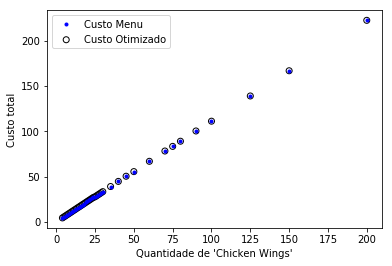

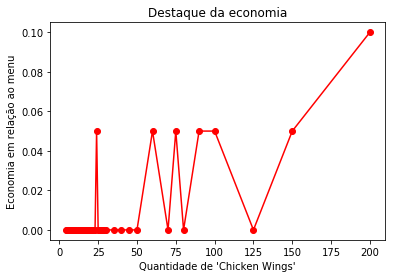

In [13]:
o_x,o_y = zip(*sorted(otimizado.items()))
m_x,m_y = zip(*sorted(menu.items()))


plt.scatter(o_x,o_y,edgecolors="k",facecolors="None",label="Custo Otimizado")
plt.plot(m_x,m_y,"b.",label="Custo Menu")
plt.legend()
plt.xlabel("Quantidade de 'Chicken Wings'")
plt.ylabel("Custo total")
plt.show()

economia = []
for item in menu:
    economia.append((item,menu[item]-otimizado[item]))

e_x,e_y = zip(*sorted(economia))

plt.plot(e_x,e_y,"ro-")
plt.xlabel("Quantidade de 'Chicken Wings'")
plt.ylabel("Economia em relação ao menu")
plt.title("Destaque da economia")

plt.show()

## Questão 4

In [14]:

SDK = np.kron(np.ones((3,3)),np.zeros((3,3)))
SDK[0,1] = 2
SDK[0,4] = 3
SDK[0,7] = 4
SDK[1,0] = 6
SDK[1,8] = 3
SDK[2,2] = 4
SDK[2,6] = 5
SDK[3,3] = 8
SDK[3,5] = 6
SDK[4,0] = 8
SDK[4,4] = 1
SDK[4,8] = 6
SDK[5,3] = 7
SDK[5,5] = 5
SDK[6,2] = 7
SDK[6,6] = 6
SDK[7,0] = 4
SDK[7,8] = 8
SDK[8,1] = 3
SDK[8,4] = 4
SDK[8,7] = 2

In [15]:
SDK

array([[0., 2., 0., 0., 3., 0., 0., 4., 0.],
       [6., 0., 0., 0., 0., 0., 0., 0., 3.],
       [0., 0., 4., 0., 0., 0., 5., 0., 0.],
       [0., 0., 0., 8., 0., 6., 0., 0., 0.],
       [8., 0., 0., 0., 1., 0., 0., 0., 6.],
       [0., 0., 0., 7., 0., 5., 0., 0., 0.],
       [0., 0., 7., 0., 0., 0., 6., 0., 0.],
       [4., 0., 0., 0., 0., 0., 0., 0., 8.],
       [0., 3., 0., 0., 4., 0., 0., 2., 0.]])

In [16]:
variaveis = {}

prob = LpProblem("Sodoku",LpMinimize)
for i in range(9):
    variaveis[i]={}
    for j in range(9):
        variaveis[i][j]=[LpVariable("Possivel_"+str(k)+"_in_"+str(i+1)+str(j+1),0,1,LpInteger) for k in range(1,10)]

prob +=sum([sum(variaveis[i][j]) for i in range(9) for j in range(9)]) #FO aleatoria = soma de todas as intancias
        
for i in range(9):
    for j in range(9):
        prob +=sum(variaveis[i][j])<=1


In [17]:

#Restrições:

#bloco 1,1 - Só pode haver apenas 1 de cada numero de 1 a 9
bloco = {}
bloco[1] = {}
bloco[1][1] ={}
for k in range(1,10):
    bloco[1][1][k] = []
    for i in range(3):
        for j in range(3):
            bloco[1][1][k].append(variaveis[i][j][k-1])
    prob +=sum(bloco[1][1][k])==1
    

#bloco 1,2 - Só pode haver apenas 1 de cada numero de 1 a 9
bloco[1][2] = {}
bloco[1][2][k] = []
for k in range(1,10):
    bloco[1][2][k] = []
    for i in range(3):
        for j in range(3,6):
            bloco[1][2][k].append(variaveis[i][j][k-1])
    prob +=sum(bloco[1][2][k])==1


#bloco 1,3 - Só pode haver apenas 1 de cada numero de 1 a 9    
bloco[1][3] = {}    
for k in range(1,10):
    bloco[1][3][k] = []
    for i in range(3):
        for j in range(6,9):
            bloco[1][3][k].append(variaveis[i][j][k-1])
    prob +=sum(bloco[1][3][k])==1    


#bloco 2,1 - Só pode haver apenas 1 de cada numero de 1 a 9
bloco[2] = {}    
bloco[2][1] = {}    
for k in range(1,10):
    bloco[2][1][k] = []
    for i in range(3,6):
        for j in range(3):
            bloco[2][1][k].append(variaveis[i][j][k-1])
    prob +=sum(bloco[2][1][k])==1


#bloco 2,2 - Só pode haver apenas 1 de cada numero de 1 a 9    
bloco[2][2] = {}
for k in range(1,10):
    bloco[2][2][k] = []
    for i in range(3,6):
        for j in range(3,6):
            bloco[2][2][k].append(variaveis[i][j][k-1])
    prob +=sum(bloco[2][2][k])==1
 

#bloco 2,3 - Só pode haver apenas 1 de cada numero de 1 a 9
bloco[2][3] = {}
for k in range(1,10):
    bloco[2][3][k] = []
    for i in range(3,6):
        for j in range(6,9):
            bloco[2][3][k].append(variaveis[i][j][k-1])
    prob +=sum(bloco[2][3][k])==1    
    

#bloco 3,1 - Só pode haver apenas 1 de cada numero de 1 a 9
bloco[3] = {}    
bloco[3][1] ={}
for k in range(1,10):
    bloco[3][1][k] = []
    for i in range(6,9):
        for j in range(3):
            bloco[3][1][k].append(variaveis[i][j][k-1])
    prob +=sum(bloco[3][1][k])==1
    

#bloco 3,2 - Só pode haver apenas 1 de cada numero de 1 a 9    
bloco[3][2] = {}
for k in range(1,10):
    bloco[3][2][k] = []
    for i in range(6,9):
        for j in range(3,6):
            bloco[3][2][k].append(variaveis[i][j][k-1])
    prob +=sum(bloco[3][2][k])==1
    

#bloco 3,3 - Só pode haver apenas 1 de cada numero de 1 a 9    
bloco[3][3] = {}
linha = {}
for k in range(1,10):
    bloco[3][3][k] = []
    for i in range(6,9):
        for j in range(6,9):
            bloco[3][3][k].append(variaveis[i][j][k-1])
    prob +=sum(bloco[3][3][k])==1 
    
    
#cada linha e cada coluna só pode ter apenas um de cada número de 1 a 9    
linha = {}
coluna = {}
for k in range(1,10):
    for i in range(9):
        linha[i]={}
        linha[i][k]=[]
        for j in range(9):
            linha[i][k].append(variaveis[i][j][k-1])
            
        prob +=sum(linha[i][k])==1 
    for j in range(9):
        coluna[j]={}
        coluna[j][k]=[]
        for i in range(9):
            coluna[j][k].append(variaveis[i][j][k-1])
        prob +=sum(coluna[j][k])==1
        
#fixando os número já fornecidos no Sudoku
for i in range(9):
    for j in range(9):
        if SDK[i][j]>0:
            prob +=variaveis[i][j][int(SDK[i][j])-1]==1

In [18]:
prob.writeLP("Soduko.lp")

prob.solve()

solucao = []
for v in prob.variables():
    if v.varValue>0:
        solucao.append(v.name)
        i=v.name.split("Possivel_")[1].split("_in_")[1][0]
        j=v.name.split("Possivel_")[1].split("_in_")[1][1]
        num=v.name.split("Possivel_")[1].split("_in_")[0]
        SDK[int(i)-1][int(j)-1]=int(num)
pd.DataFrame(SDK)

,0,1,2,3,4,5,6,7,8
0,9.0,2.0,5.0,6.0,3.0,1.0,8.0,4.0,7.0
1,6.0,1.0,8.0,5.0,7.0,4.0,2.0,9.0,3.0
2,3.0,7.0,4.0,9.0,8.0,2.0,5.0,6.0,1.0
3,7.0,4.0,9.0,8.0,2.0,6.0,1.0,3.0,5.0
4,8.0,5.0,2.0,4.0,1.0,3.0,9.0,7.0,6.0
5,1.0,6.0,3.0,7.0,9.0,5.0,4.0,8.0,2.0
6,2.0,8.0,7.0,3.0,5.0,9.0,6.0,1.0,4.0
7,4.0,9.0,1.0,2.0,6.0,7.0,3.0,5.0,8.0
8,5.0,3.0,6.0,1.0,4.0,8.0,7.0,2.0,9.0
